# K-NN in python: search for the best k

## 1- Load the required modeules

In [1]:
import numpy as np                     # Llibreria matemÃƒÂ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃƒÂ©s facilment el dataset digits
import pandas as pd
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import recall_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
def plot_cmatrix(y_test, y_pred_test):
    confmat = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Purples, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    #plt.savefig('ConMatrixNB_fit_thres.png', dpi=600)
    plt.show()
    print(recall_score(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))

## 2- Load the data

In [3]:
# Load digits dataset
data = pd.read_csv("data_balanced_normalized.csv",
                        na_values=['NA', 'N/A'],
                        keep_default_na=False)



# Separate data from labels
y = data['heart_attack']
X = data.drop(columns=['heart_attack'])



# Train-test split on the sampled data (BEFORE preprocessing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=1 # random_state always with the same fixed value -> data split always the same; random_state = none -> each execution

)
#print(X)

## 5-fold cross-validation

In [7]:
# Method 1
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
cv=5
cv_scores = cross_val_score(nb.KNeighborsClassifier(),
                            X=X_train,
                            y=y_train,
                            cv=cv, scoring='recall')

# cv_scores is a list with 10 accuracies (one for each validation)
print(cv_scores)

[0.65055118 0.6488189  0.64472441 0.63700787 0.64094488]


In [191]:
# Method 2
# Build confussion matrix of all 5 cross-validations
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
cv=5
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X_train, y=y_train,  cv=cv)


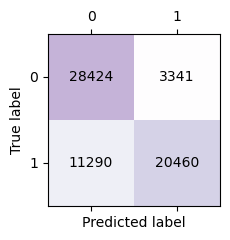

0.6444094488188976
              precision    recall  f1-score   support

           0       0.72      0.89      0.80     31765
           1       0.86      0.64      0.74     31750

    accuracy                           0.77     63515
   macro avg       0.79      0.77      0.77     63515
weighted avg       0.79      0.77      0.77     63515



In [193]:
plot_cmatrix(y_train, predicted)

## 5- Finding best features for k-NN

In [45]:
def mutual_info_with_seed(X, y):
    return mutual_info_classif(X, y, random_state=1)

In [54]:
vector_of_means = np.zeros(33)
cv = 5
for i in range(33):
    X_new = SelectKBest(
        score_func=mutual_info_with_seed, k = i + 1
    ).fit_transform(X_train, y_train)
    cv_scores = cross_val_score(
        nb.KNeighborsClassifier(),
        X = X_new,
        y = y_train,
        cv = cv,
        scoring = "recall"
    )
    vector_of_means[i] = np.mean(cv_scores)

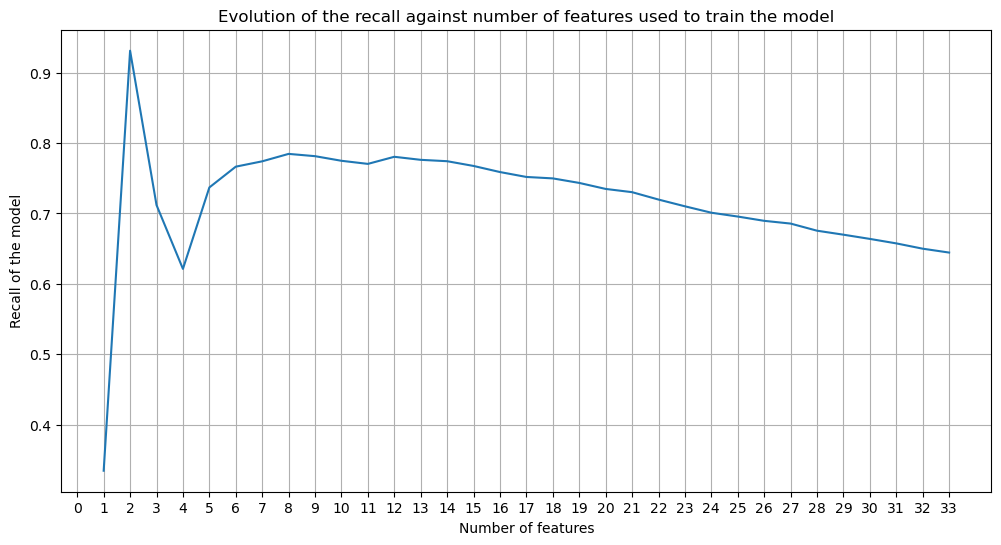

In [55]:
fig = plt.figure(figsize = (12, 6))  # Just declare the figure object and give dimensions
plt.grid(True)
plt.title("Evolution of the recall against number of features used to train the model")
plt.ylabel("Recall of the model")
plt.xlabel("Number of features")
plt.xticks(np.arange(0, 34, step=1))
plt.plot(range(1,34), vector_of_means)
plt.show()



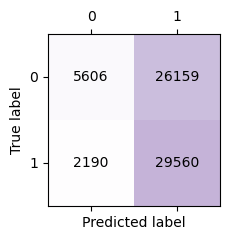

0.9310236220472441
              precision    recall  f1-score   support

           0       0.72      0.18      0.28     31765
           1       0.53      0.93      0.68     31750

    accuracy                           0.55     63515
   macro avg       0.62      0.55      0.48     63515
weighted avg       0.62      0.55      0.48     63515



In [177]:
X_new = SelectKBest(score_func=mutual_info_with_seed, k=2).fit_transform(X_train, y_train)

cv = 5
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X_new, y=y_train,  cv=cv)

plot_cmatrix(y_train, predicted)

Best recall for class 1 is with k = 2, but the other metrics are too affected by that threshold, so we will try with the following one. Also see the tendencies with stratified 5-fold

In [48]:
vector_of_means = np.zeros(33)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for i in range(33):
    X_new = SelectKBest(
        score_func=mutual_info_with_seed, k = i + 1
    ).fit_transform(X_train, y_train)
    cv_scores = cross_val_score(
        nb.KNeighborsClassifier(),
        X = X_new,
        y = y_train,
        cv = cv,
        scoring = "recall"
    )
    vector_of_means[i] = np.mean(cv_scores)



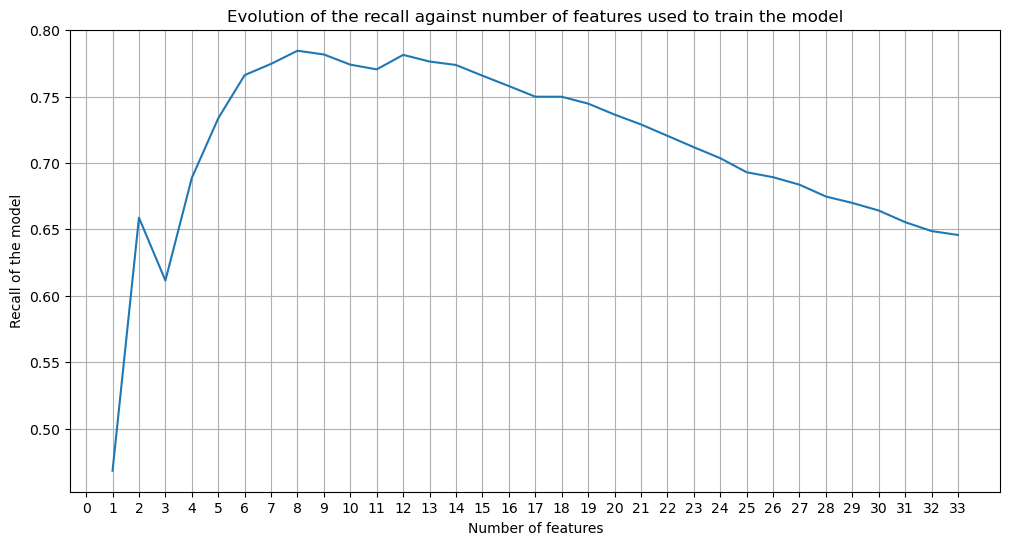

In [49]:
fig = plt.figure(figsize = (12, 6))  # Just declare the figure object and give dimensions
plt.grid(True)
plt.title("Evolution of the recall against number of features used to train the model")
plt.ylabel("Recall of the model")
plt.xlabel("Number of features")
plt.xticks(np.arange(0, 34, step=1))
plt.plot(range(1,34), vector_of_means)
plt.show()



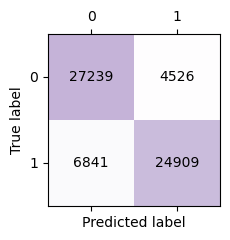

0.7845354330708662
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     31765
           1       0.85      0.78      0.81     31750

    accuracy                           0.82     63515
   macro avg       0.82      0.82      0.82     63515
weighted avg       0.82      0.82      0.82     63515



In [56]:
X_new = SelectKBest(score_func=mutual_info_with_seed, k=8).fit_transform(X_train, y_train)

cv = 5
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X_new, y=y_train,  cv=cv)

plot_cmatrix(y_train, predicted)

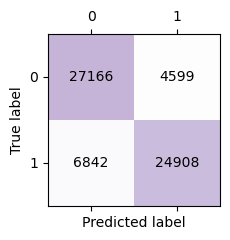

0.784503937007874
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     31765
           1       0.84      0.78      0.81     31750

    accuracy                           0.82     63515
   macro avg       0.82      0.82      0.82     63515
weighted avg       0.82      0.82      0.82     63515



In [51]:
X_new = SelectKBest(score_func=mutual_info_with_seed, k=8).fit_transform(X_train, y_train)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X_new, y=y_train,  cv=cv)

plot_cmatrix(y_train, predicted)

## 5- Finding best parameters for k-NN (Yet to check)

In [62]:
from sklearn.pipeline import Pipeline

# Define pipeline with feature selection and KNN
pipeline = Pipeline([
    ("selector", SelectKBest(score_func=mutual_info_with_seed,k=8)),
    ("knn", nb.KNeighborsClassifier())
])

recall_scorer = make_scorer(recall_score, pos_label=1)
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Shared CV splits

cv = 5

# Evaluate uniform weighting
no_weighted_means = []
for ki in range(1, 33, 2):
    pipeline.set_params(knn__n_neighbors=ki, knn__weights='uniform')
    cv_scores = cross_val_score(
        pipeline,
        X=X_train,  # Use full X_train (feature selection is inside CV)
        y=y_train,
        cv=cv,
        scoring=recall_scorer
    )
    no_weighted_means.append(np.mean(cv_scores))

# Evaluate distance weighting
weighted_means = []
for ki in range(1, 33, 2):
    pipeline.set_params(knn__n_neighbors=ki, knn__weights="distance")
    cv_scores = cross_val_score(
        pipeline,
        X=X_train,
        y=y_train,
        cv=cv,
        scoring=recall_scorer
    )
    weighted_means.append(np.mean(cv_scores))

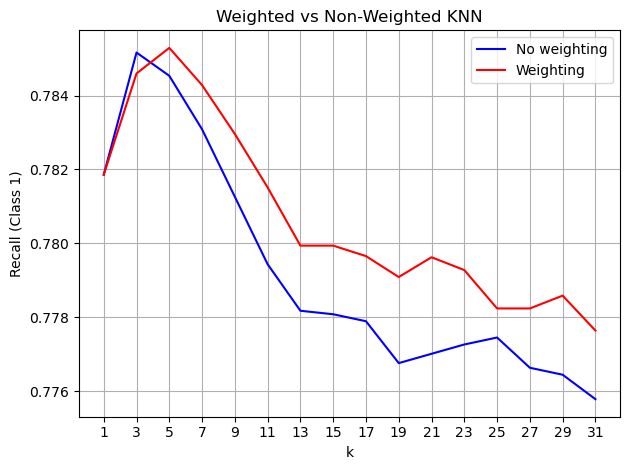

Exception ignored in: <function ResourceTracker.__del__ at 0x7ebde1696b60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x78d35d78ab60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x750aec38ab60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/reso

In [75]:
# Plotting
plt.plot(range(1, 33, 2), no_weighted_means, "b", label="No weighting")
plt.plot(range(1, 33, 2), weighted_means, "r", label="Weighting")
plt.title("Weighted vs Non-Weighted KNN")
plt.xlabel("k")
plt.ylabel("Recall (Class 1)")  # Corrected label
plt.legend()
plt.xticks(range(1, 33, 2))
plt.grid()
plt.tight_layout()
plt.show()

In [65]:
print("Uniform Recall == Weighted Recall: ", no_weighted_means == weighted_means)

Uniform Recall == Weighted Recall:  False


Weighting affects performance. The best results are with 5 neighbors and with weighted distance

Based on the k best features that we found earlier, we now apply GridSearchCV in order to find the best parameters

In [220]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameters for GridSearchCV
params = {
    "n_neighbors": list(range(1, 20, 2)),
    "weights": ('distance', 'uniform'),
    "p": list(range(1, 3))
}

# Initialize KNN classifier
knc = KNeighborsClassifier()

# Create recall scorer for class 1
recall_scorer = make_scorer(recall_score, pos_label=1)

# Select top 8 features using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=8)
X_reduced = selector.fit_transform(X_train, y_train)

# Define 5-fold cross-validation
cv = 5

# Set up GridSearchCV with recall scoring
clf = GridSearchCV(
    knc,
    param_grid=params,
    cv=cv,
    scoring=recall_scorer,  # Use custom recall scorer
    n_jobs=-1,
    return_train_score=True  # Optional: Include training scores in results
)

# Fit GridSearchCV on the reduced training data
clf.fit(X_reduced, y_train)

# Get cross-validated predictions on the training set
y_pred_train = cross_val_predict(
    clf.best_estimator_,  # Use the best model found by GridSearchCV
    X_reduced,
    y_train,
    cv=cv
)

print("Best Hyperparameters:", clf.best_params_)
print("Mean Cross-Validated Recall (Training):", clf.best_score_)


Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Mean Cross-Validated Recall (Training): 0.7866456692913386


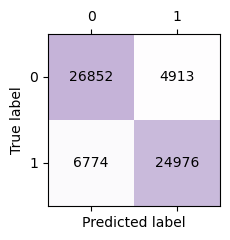

0.7866456692913386
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     31765
           1       0.84      0.79      0.81     31750

    accuracy                           0.82     63515
   macro avg       0.82      0.82      0.82     63515
weighted avg       0.82      0.82      0.82     63515



Exception ignored in: <function ResourceTracker.__del__ at 0x734214b8eb60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x781423686b60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x761d5b586b60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/reso

In [198]:
plot_cmatrix(y_train, y_pred_train)

## ROC curve with the best parameters found

In [227]:
# ==== 5-Fold Threshold Optimization (With Feature Pre-Selection) ====
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Select 8 best features ONCE (RISK: Data leakage!)
selector = SelectKBest(score_func=mutual_info_with_seed, k=8)
X_reduced = selector.fit_transform(X_train, y_train)  # Leakage: Uses full X_train

# Initialize
cv = KFold(n_splits=5)
optimal_thresholds = []
auc_scores = []
y_true_list, y_proba_list = [], []

# Define KNN with best hyperparameters
knn = nb.KNeighborsClassifier(**clf.best_params_)

# Loop over folds (using pre-selected features)
for train_idx, val_idx in cv.split(X_reduced, y_train):
    X_fold_train, y_fold_train = X_reduced[train_idx], y_train.iloc[train_idx]
    X_fold_val, y_fold_val = X_reduced[val_idx], y_train.iloc[val_idx]
    
    # Train KNN on pre-selected features
    knn.fit(X_fold_train, y_fold_train)
    
    # Predict probabilities on validation fold
    y_proba_val = knn.predict_proba(X_fold_val)[:, 1]
    
    # Compute optimal threshold for this fold (Youden's J)
    fpr, tpr, thresholds = roc_curve(y_fold_val, y_proba_val)
    youden_j = tpr - fpr
    optimal_idx = np.argmax(youden_j)
    optimal_thresholds.append(thresholds[optimal_idx])
    
    # Compute AUC for this fold
    fold_auc = auc(fpr, tpr)
    auc_scores.append(fold_auc)
    
    # Aggregate validation predictions
    y_true_list.extend(y_fold_val)
    y_proba_list.extend(y_proba_val)

# Average thresholds and AUC across folds
mean_optimal_threshold = np.mean(optimal_thresholds)
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

print(f"Mean Optimal Threshold (5-Fold): {mean_optimal_threshold:.2f}")
print(f"Cross-validated Mean AUC: {mean_auc:.2f} ± {std_auc:.2f}")

# Plot aggregated ROC curve
fpr, tpr, _ = roc_curve(y_true_list, y_proba_list)
roc_auc = auc(fpr, tpr)

Mean Optimal Threshold (5-Fold): 0.60
Cross-validated Mean AUC: 0.89 ± 0.00


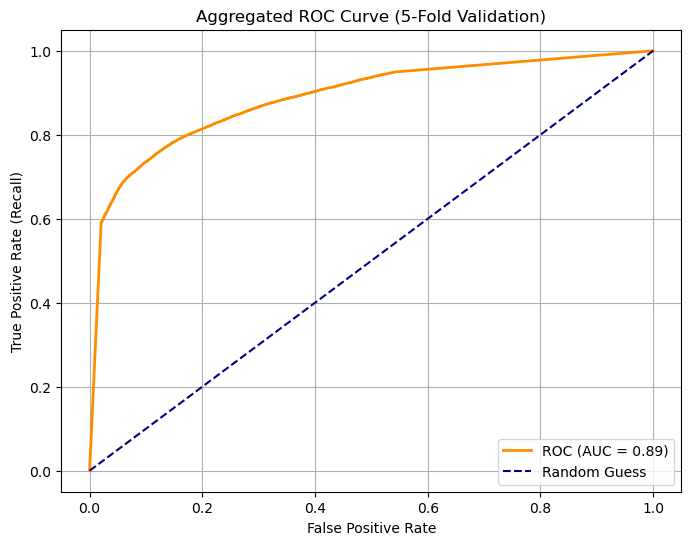

In [228]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="navy", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Aggregated ROC Curve (5-Fold Validation)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [185]:
# Print mean and std of cross-validated AUC
print(f"Cross-validated Mean AUC: {roc_auc:.2f} ± {std_auc:.2f}")
# Print standard deviation of AUC across folds
print(f"AUC variability across folds: ±{roc_auc:.2f}")
if roc_auc > 0.5:
    print("Model outperforms random guessing (AUC > 0.5).")
else:
    print("Model is no better than random guessing (AUC ≤ 0.5).")

Cross-validated Mean AUC: 0.89 ± 0.05
AUC variability across folds: ±0.89
Model outperforms random guessing (AUC > 0.5).


Since the ROC curve is above the diagonal "chance line" (AUC > 0.5), our model is better than random guessing (good discrimination capability on the training folds).

Optimal threshold gives us the best result using Youden's index. However, we want to optimize the recall more, while maintaining good fairly good results for the other metrics.

For that, we will want a low threshold, wich will increase the TPR at the cost of also icreasing FPR (more cases will be awarded as positive in general due to having a less strict minimum of probabilities for them to be considered positive).

We will use a threshold of 0.3, which indicates that any patient with > 0.3 predicted probability will be classified as a positive. We consider that 0.87 recall is a good result, and lowering the threshold worsens the fairly good accuracy obtained with the selected threshold.

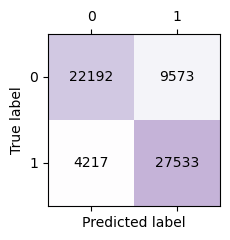

0.8671811023622047
              precision    recall  f1-score   support

           0       0.84      0.70      0.76     31765
           1       0.74      0.87      0.80     31750

    accuracy                           0.78     63515
   macro avg       0.79      0.78      0.78     63515
weighted avg       0.79      0.78      0.78     63515



In [229]:
# Apply threshold to cross-validated predictions
y_pred = (np.array(y_proba_list) >= 0.3).astype(int)
plot_cmatrix(y_true_list, y_pred)

In [232]:
# Train the final model on the FULL training set (with pre-selected features)
selector = SelectKBest(score_func=mutual_info_with_seed, k=8)
X_reduced = selector.fit_transform(X_train, y_train)  # Leaky feature selection

final_model = nb.KNeighborsClassifier(**clf.best_params_)
final_model.fit(X_reduced, y_train)

# Select the same 8 features from the test set
X_test_reduced = selector.transform(X_test)

# Predict probabilities on the test set
y_proba_test = final_model.predict_proba(X_test_reduced)[:, 1]

# Apply the cross-validated optimal threshold
y_pred_test = (y_proba_test >= 0.3).astype(int)

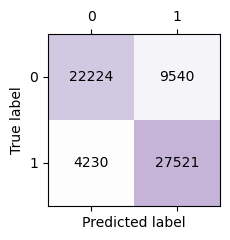

0.8667758495795408
              precision    recall  f1-score   support

           0       0.84      0.70      0.76     31764
           1       0.74      0.87      0.80     31751

    accuracy                           0.78     63515
   macro avg       0.79      0.78      0.78     63515
weighted avg       0.79      0.78      0.78     63515



In [233]:
# Evaluate
plot_cmatrix(y_test, y_pred_test)

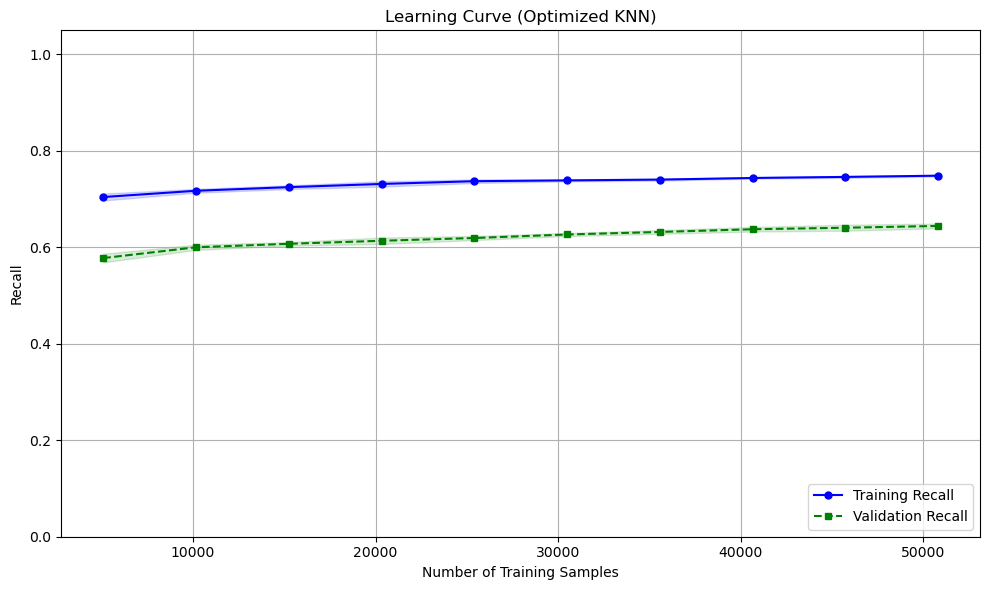

Exception ignored in: <function ResourceTracker.__del__ at 0x7d942398eb60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7b9a18c8ab60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x70059388ab60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/reso

In [178]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=clf.best_estimator_,  # Use optimized pipeline
    X=X_train,
    y=y_train,
    cv=5,                    # 5-fold cross-validation
    scoring="recall",         # Focus on recall
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 intervals of training data
    shuffle=True,
    random_state=1
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(
    train_sizes, train_mean,
    color="blue", marker="o",
    markersize=5, label="Training Recall"
)
plt.fill_between(
    train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color="blue"
)

plt.plot(
    train_sizes, val_mean,
    color="green", linestyle="--",
    marker="s", markersize=5,
    label="Validation Recall"
)
plt.fill_between(
    train_sizes,
    val_mean + val_std,
    val_mean - val_std,
    alpha=0.15, color="green"
)

plt.xlabel("Number of Training Samples")
plt.ylabel("Recall")
plt.legend(loc="lower right")
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.title("Learning Curve (Optimized KNN)")
plt.tight_layout()
plt.show()

Both train and validation recall go up with more data.

    At 5 k samples, we get about 70% recall on the training split and 58% on validation.

    By ~50 k samples, training recall has crept up to ~75% and validation to ~64%.

    Basically, adding data is helping the model generalize.

There’s a persistent gap (≈0.10) between training and validation.

    KNN “remembers” the training points better than it generalizes to held-out examples, which could be a sign of some over-fitting (variance).

    Since the gap never closes, throwing more data at it will help, but won’t completely eliminate that variance.

Returns are diminishing.

    Both curves are flattening out by the right-hand side, meaning we would need a lot more data to eke out another percent of recall.